# Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

BoomBikes aspires to understand the demand for shared bikes among the people after ongoing quarantine situation ends across the nation due to Covid-19.

Company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 

## 1. Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from CSV file 
df_day = pd.read_csv("day.csv")

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_day.shape

(730, 16)

In [5]:
# dropping constant colums as they are not usefull in analysis
df_day = df_day.drop(["instant","dteday",'casual','registered'], axis =1)


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### No null values observed.

In [7]:
df_day['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [8]:
df_day['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
df_day['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
## Converting to categorical string values
df_day['weathersit'].replace({1:'Clear, Few clouds', #, Partly cloudy, Partly cloudy', 
                              2:'Mist + Cloudy', #, Mist + Broken clouds, Mist + Few clouds, Mist', 
                              3:'Light Snow, Light Rain', #+ Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                              4:'Heavy Rain + Ice Pallets', #  + Thunderstorm + Mist, Snow + Fog'
                              }, inplace=True)
df_day['yr'].replace({0: 2018, 1:2019}, inplace=True)
df_day['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df_day['weekday'].replace({1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 0:'Sun'}, inplace=True)
df_day['mnth'].replace({1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:'May', 6:'Jun',7:'July',8:'Aug',9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)



In [11]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,"Clear, Few clouds",8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tues,1,"Clear, Few clouds",8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,"Clear, Few clouds",9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df_day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 2. Visualising the Data & performing univariate/bivariate analysis

<Axes: >

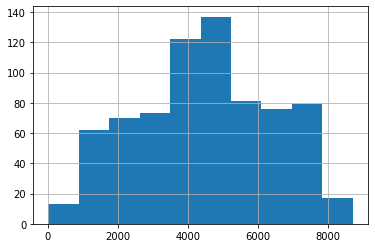

In [13]:
# Checking distribution of count "cnt"

df_day['cnt'].hist()


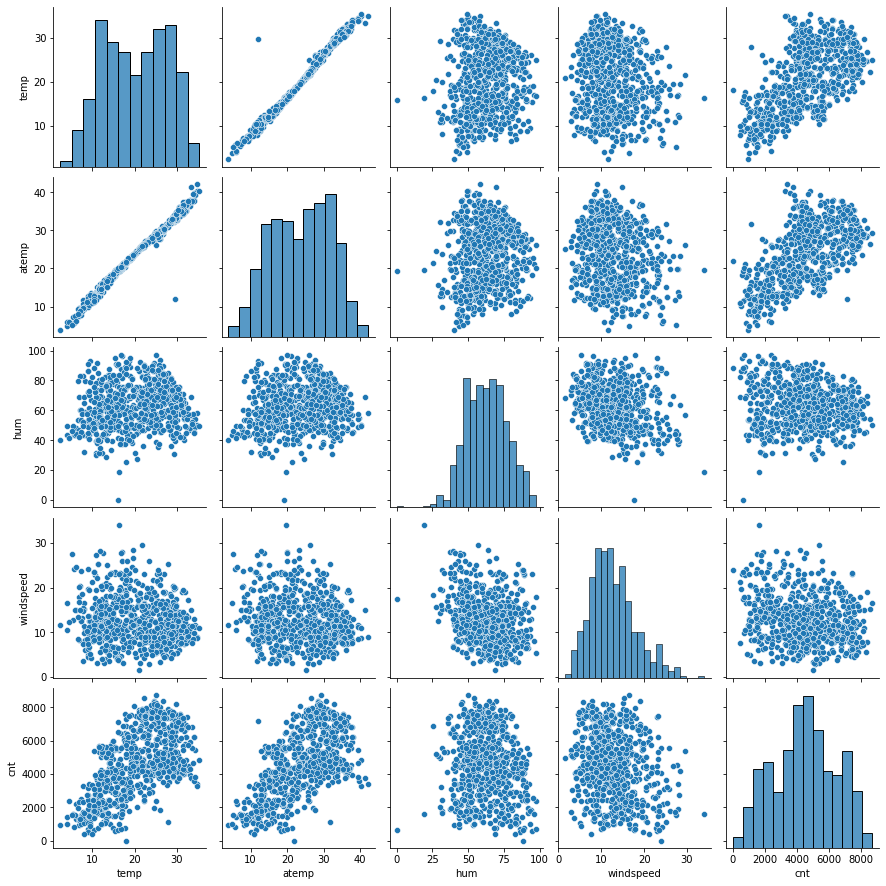

In [14]:
#### Visualising Numeric Variables
num_cols = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(df_day[num_cols])
plt.show()

### From above we can observe that 
1. There is signifiance relationship between variables "temp" and "atemp" 
2. "temp" and "atemp" shows positive correlationship with cnt (count)

In [15]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

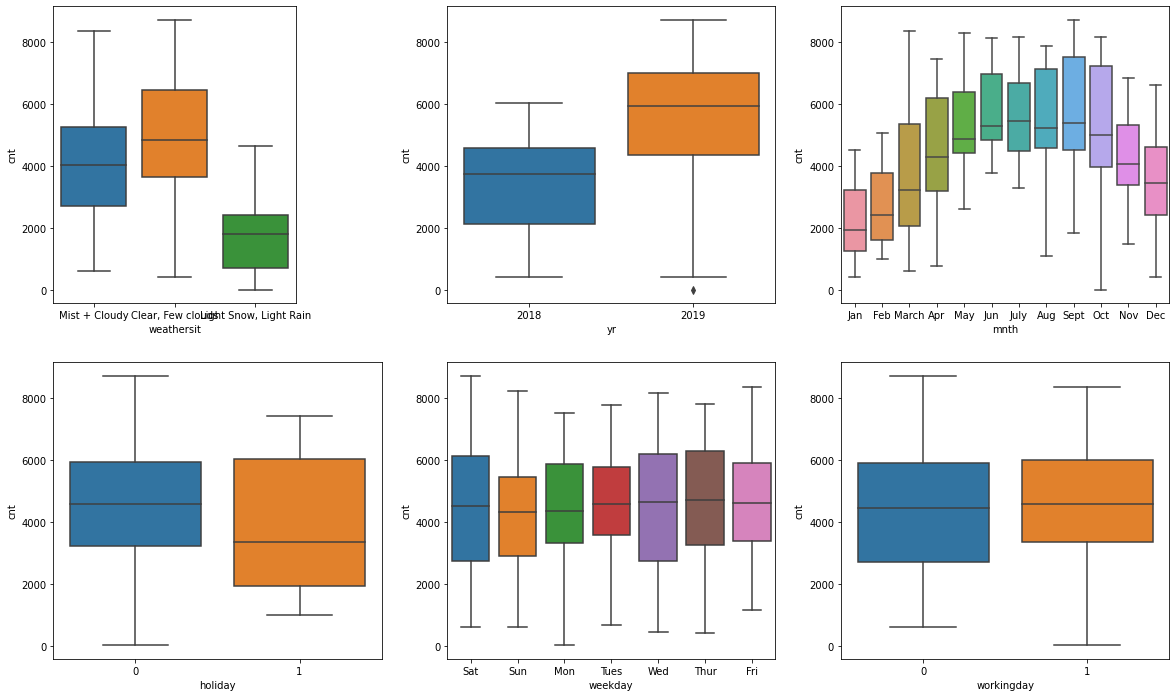

In [16]:
#### Visualising Categorical Variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.subplot(2,4,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)

plt.show() 


### From above we can observe 
1. bike sharing demand is high when weather is clear or with few clouds
2. Bike sharing demand was high in year 2019

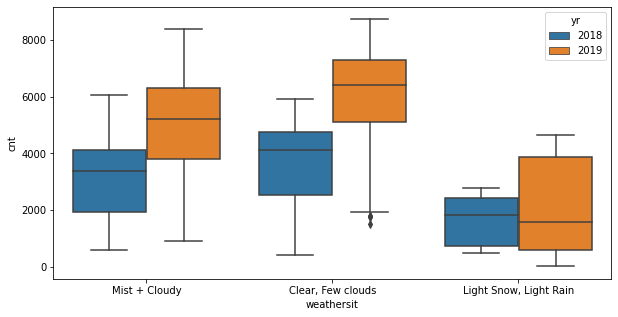

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = df_day)
plt.show()

###  Above is the plot for weathersit with year as the hue.

## 3. Data preparation

Convert categorical variables using dummy variables where categories are more than 2

In [18]:
# Get the dummy variables for columns 'season', 'mnth', 'weekday','weathersit'
def add_dummies(col, df):
    status = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, status], axis = 1)
    return df

In [19]:
dum_cols = ['season', 'mnth', 'weekday','weathersit']

for col in dum_cols:
    df_day = add_dummies(col, df_day)


In [20]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,Jan,0,Mon,1,"Clear, Few clouds",8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tues,1,"Clear, Few clouds",8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Wed,1,"Clear, Few clouds",9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_day['yr'].replace({2018:0, 2019:1}, inplace=True)

In [22]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,"Clear, Few clouds",8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tues,1,"Clear, Few clouds",8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,"Clear, Few clouds",9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# Dropping columns for which we added dummies
df_day.drop(['weathersit','season','weekday','mnth'], axis = 1, inplace = True)

In [24]:
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 4. Splitting the Data into Training and Testing Sets


In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_cols = ['temp','atemp','hum','windspeed','cnt']

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [28]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


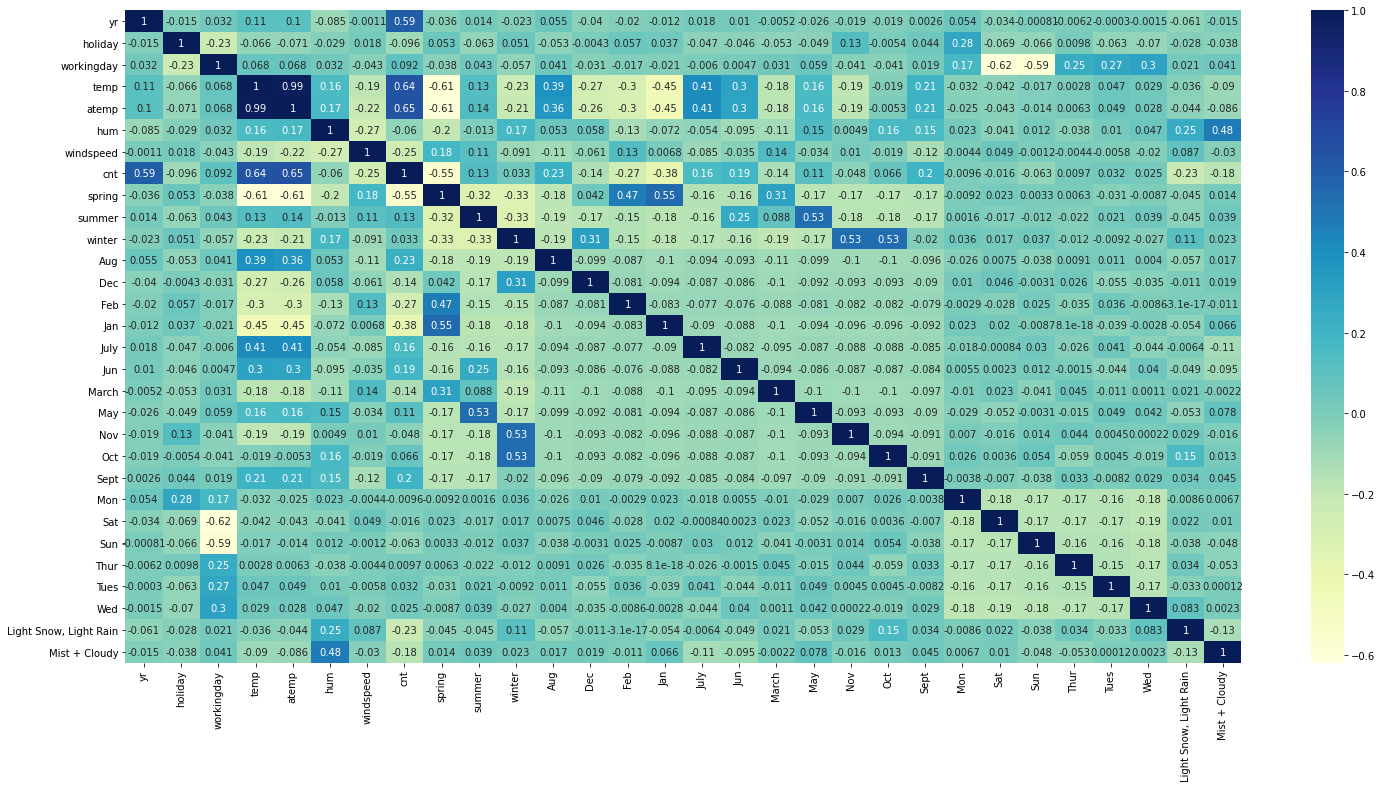

In [30]:
plt.figure(figsize = (25, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see from above:
1. temp have positive relationship with cnt
2. There is positive relationship between hum and mist+cloudy weather
3. Also there is positive relationship between months and season, for example may and summer, Nov and winter
4. There is low neagative correlation between cnt and windspeed
5. There is neagative correlation between cnt and spring

In [31]:
# plotting temp vs cnt

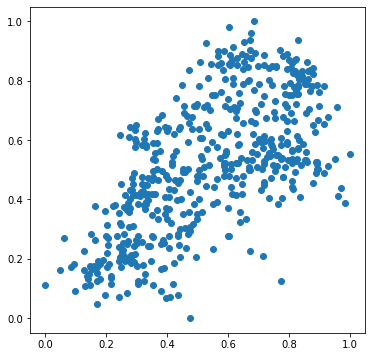

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## 5. Building a Linear model

### Adding all the variables to the model

In [33]:
y_train = df_train.pop('cnt')  
X_train = df_train



In [34]:
X_train.shape

(510, 29)

In [35]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

### RFE

In [36]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train) 

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thur', False, 12),
 ('Tues', False, 10),
 ('Wed', False, 13),
 ('Light Snow, Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [38]:
X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sept', 'Sat',
       'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [39]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,July,Sept,Sat,"Light Snow, Light Rain",Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [40]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,July,Sept,Sat,"Light Snow, Light Rain",Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [41]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [42]:
lr.params

const                     0.251042
yr                        0.230502
holiday                  -0.058529
workingday                0.043521
temp                      0.509836
hum                      -0.154716
windspeed                -0.185956
spring                   -0.050806
summer                    0.049660
winter                    0.094426
Jan                      -0.034326
July                     -0.053193
Sept                      0.081186
Sat                       0.053721
Light Snow, Light Rain   -0.248777
Mist + Cloudy            -0.057824
dtype: float64

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          2.31e-191
Time:                        09:11:54   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Looking at the p-values, we see that  some of the variables aren't really significant (in the presence of other variables).

#### We will check further with VIF

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist + Cloudy,2.29
0,yr,2.09
12,Sat,1.98


In [46]:
# Dropping col "hum" as it has high VIF and train model
X_train_rfe = X_train_rfe.drop("hum", axis=1)
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
lr_1.params

const                     0.173663
yr                        0.234361
holiday                  -0.056199
workingday                0.046502
temp                      0.472823
windspeed                -0.156264
spring                   -0.059704
summer                    0.043352
winter                    0.079699
Jan                      -0.038947
July                     -0.048222
Sept                      0.075318
Sat                       0.058434
Light Snow, Light Rain   -0.291727
Mist + Cloudy            -0.082621
dtype: float64

In [48]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          7.33e-189
Time:                        09:11:54   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1737      0.031      5.525      0.000       0.112       0.235
yr                         0.2344      0.008     29.019      0.000       0.218       0.250
holiday                   -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                 0.0465      0.012      3.983      0.000       0.024       0.069
temp                       0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                 -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring                    -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer                     0.0434      0.015      2.890      0.004       0.014       0.073
winter                     0.0797      0.017      4.650      0.000       0.046       0.113
Jan                       -0.0389      0.018     -2.215      0.027      -0.073      -0.004
July                      -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sept                       0.0753      0.017      4.522      0.000       0.043       0.108
Sat                        0.0584      0.015      3.980      0.000       0.030       0.087
Light Snow, Light Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist + Cloudy             -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Sat,1.97
8,Jan,1.62
9,July,1.59


### P-value for all variables is less that 0.05. Droping "temp" column as it has VIF > 5


In [50]:
X_train_rfe = X_train_rfe.drop("temp", axis=1)
X_train_lm = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          4.04e-154
Time:                        09:11:55   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5448      0.020     27.136      0.000       0.505       0.584
yr                         0.2478      0.009     26.156      0.000       0.229       0.266
holiday                   -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                 0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                 -0.1878      0.029     -6.429      0.000      -0.245      -0.130
spring                    -0.2603      0.018    -14.490      0.000      -0.296      -0.225
summer                    -0.0440      0.016     -2.729      0.007      -0.076      -0.012
winter                    -0.0749      0.016     -4.829      0.000      -0.105      -0.044
Jan                       -0.1024      0.020     -5.104      0.000      -0.142      -0.063
July                      -0.0099      0.021     -0.461      0.645      -0.052       0.032
Sept                       0.0708      0.020      3.601      0.000       0.032       0.109
Sat                        0.0564      0.017      3.252      0.001       0.022       0.090
Light Snow, Light Rain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
Mist + Cloudy             -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,Sat,1.69
7,Jan,1.60
12,Mist + Cloudy,1.56
8,July,1.30


#### VIF is low for all variables, however we see high p-value for variable "July", hence dropping it

In [53]:
# droping "July" column
X_train_rfe = X_train_rfe.drop("July", axis=1)
X_train_lm = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          3.62e-155
Time:                        09:11:55   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5409      0.018     29.669      0.000       0.505       0.577
yr                         0.2478      0.009     26.182      0.000       0.229       0.266
holiday                   -0.0567      0.032     -1.760      0.079      -0.120       0.007
workingday                 0.0483      0.014      3.506      0.000       0.021       0.075
windspeed                 -0.1877      0.029     -6.431      0.000      -0.245      -0.130
spring                    -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer                    -0.0405      0.014     -2.848      0.005      -0.068      -0.013
winter                    -0.0716      0.014     -5.213      0.000      -0.099      -0.045
Jan                       -0.1025      0.020     -5.111      0.000      -0.142      -0.063
Sept                       0.0736      0.019      3.928      0.000       0.037       0.110
Sat                        0.0565      0.017      3.263      0.001       0.022       0.091
Light Snow, Light Rain    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
Mist + Cloudy             -0.0893      0.010     -8.820      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,spring,2.68
5,summer,2.00
0,yr,1.89
6,winter,1.78
9,Sat,1.62
7,Jan,1.60
11,Mist + Cloudy,1.56
8,Sept,1.20


#### VIF is good, however p-value is > 0.05 for "holiday", hence dropping it

In [56]:
# droping "holiday" column as it has p-value > 0.05
X_train_rfe = X_train_rfe.drop("holiday", axis=1)
X_train_lm = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          1.30e-155
Time:                        09:11:55   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5334      0.018     30.033      0.000       0.499       0.568
yr                         0.2480      0.009     26.149      0.000       0.229       0.267
workingday                 0.0567      0.013      4.377      0.000       0.031       0.082
windspeed                 -0.1887      0.029     -6.453      0.000      -0.246      -0.131
spring                    -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer                    -0.0406      0.014     -2.847      0.005      -0.069      -0.013
winter                    -0.0729      0.014     -5.303      0.000      -0.100      -0.046
Jan                       -0.1031      0.020     -5.130      0.000      -0.143      -0.064
Sept                       0.0714      0.019      3.810      0.000       0.035       0.108
Sat                        0.0650      0.017      3.900      0.000       0.032       0.098
Light Snow, Light Rain    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
Mist + Cloudy             -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,1.99
0,yr,1.88
5,winter,1.73
6,Jan,1.60
8,Sat,1.56
10,Mist + Cloudy,1.56
7,Sept,1.18


## 6. Residual Analysis of the train data

#### the VIFs and p-values both are within an acceptable range.
#### Also R-squared is 0.779 and adjusted R-squared is 0.775,  So we go ahead and make our predictions using this model lr_4.

In [59]:
y_train_pred = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

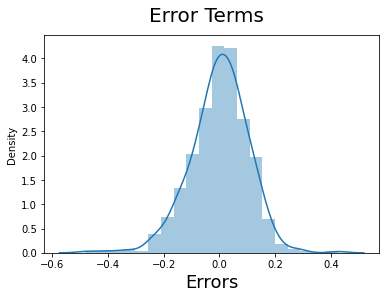

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Errors are nomrally distributed around mean 0

## 7. Making Predictions Using the Final Model 

#### Applying the scaling on the test sets

In [61]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [62]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,0,0


In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thur,Tues,Wed,"Light Snow, Light Rain",Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
#### Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sept', 'Sat',
       'Light Snow, Light Rain', 'Mist + Cloudy']]

In [65]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [66]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'Jun',
       'March', 'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tues', 'Wed', 'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [67]:
X_test_m4.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Jan', 'July', 'Sept', 'Sat',
       'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [68]:
X_test_m4.shape

(219, 16)

In [69]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["hum", "temp", "July","holiday"], axis = 1)

In [70]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter',
       'Jan', 'Sept', 'Sat', 'Light Snow, Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [71]:
# Making predictions

y_pred_m4 = lr_4.predict(X_test_m4)

## 8. Model Evaluation

Text(0, 0.5, 'y_pred_m4')

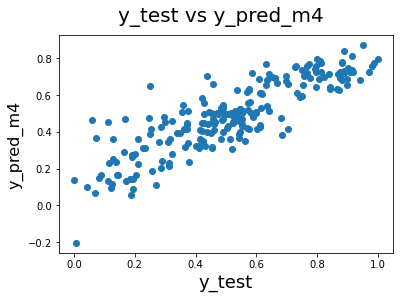

In [72]:
# plotting actual vs predicted variables
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m4', fontsize = 16)  

#### From above, y_test vs y_pred values shows linear relationship

In [73]:
# Checking R-squared value for test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7228031787739227

In [74]:
lr_4.params


const                     0.533414
yr                        0.247992
workingday                0.056660
windspeed                -0.188736
spring                   -0.258069
summer                   -0.040579
winter                   -0.072862
Jan                      -0.103085
Sept                      0.071353
Sat                       0.065027
Light Snow, Light Rain   -0.303393
Mist + Cloudy            -0.088820
dtype: float64

The equation of our best fitted line is:
$ cnt = 0.2480  \times  yr -0.056660  \times  workingday -0.188736 \times windspeed -0.258069 \times spring -0.040579 \times summer -0.072862 \times winter -0.103085 \times Jan + 0.071353 \times sept + 0.065027 \times Saturday - 0.303393 \times "Light Snow, Light Rain" - 0.088820 \times "Mist + Cloudy" $


#### Note : Overall we have a decent model, but we also acknowledge that we could do better. 


## 9. Conclustion:
From above model, we can say that below variables are significant in predicting the demand for shared bikes.
Positive correlation of below variables:
* yr                        
* workingday                
* windspeed                
* spring                   
* summer                   
* winter                   
* Jan                     
* Sept                      
* Sat                       
* Light Snow, Light Rain   
* Mist + Cloudy            